### Check that fields from CPL hist file and table match those from MOM6

### bmom.e23.f09_t061_zstar_N65.mct.short_insta_checks.001 (v1)
This is a 2 day run using out-of-the-box BMOM with the following modifications:

* ROF_NCPL=48; OCN_NCPL=48; GLC_NCPL=48
* budget_daily = 1; budget_inst = 1, in user_nl_cpl

Saving MOM6 daily/hourly mean/snapshot forcing variables to compare against the CPL heat budget table and hostory files. Heat budget analysis done over one hour. 


In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.mct.short_insta_checks.001/run/'
grd = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.mct.short_insta_checks.001.mom6.static.nc')
area = np.ma.masked_where(grd.wet==0,grd.area_t)
grd_xr = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.mct.short_insta_checks.001.mom6.static.nc', xrformat=True)

MOM6 grid successfully loaded... 

MOM6 grid successfully loaded... 



### MOM6 forcing data (hourly snap)

In [3]:
ds_mom =  xr.open_dataset(path+'prog__0001_001.nc')

In [4]:
print('Times: ',ds_mom.time.values[:])

Times:  [cftime.DatetimeNoLeap(1, 1, 1, 1, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 2, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 3, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 4, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 5, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 6, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 7, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 8, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 9, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 10, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 11, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 13, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 14, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 1, 15, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 

### CPL history data

In [6]:
ds_cpl = xr.open_mfdataset(path+'bmom.e23.f09_t061_zstar_N65.mct.short_insta_checks.001.cpl.hi.0001-01-01-?????.nc')

In [8]:
ds_cpl.time.values

array([cftime.DatetimeNoLeap(1, 1, 1, 1, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 2, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 3, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 4, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 5, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 7, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 8, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 9, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 10, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 11, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 13, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 14, 0, 0, 0, has_year_zero=True),
 

In [9]:
C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

### Areas

In [11]:
n=0
# areas
#earth_rad = 6.37122e6 # in m (from shr_constants)
earth_rad = 6.378e6 # in m (from MOM6)

model_area = np.ma.masked_invalid(ds_cpl.domo_aream[n,:].values)
med_area= np.ma.masked_invalid(ds_cpl.domo_area[n,:].values)

#med2mod_areacor = med_area/model_area
#mod2med_areacor = model_area/med_area

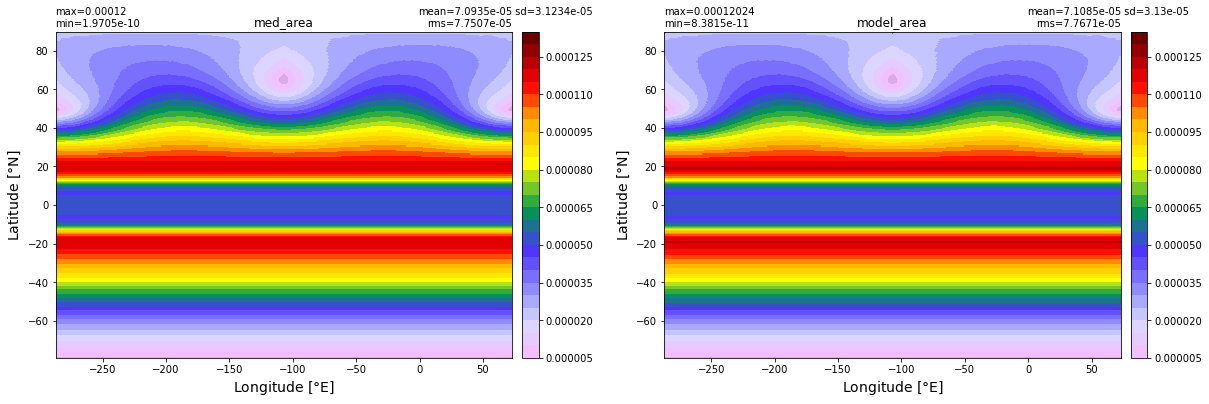

In [12]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

xyplot(med_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='med_area')
xyplot(model_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='model_area')


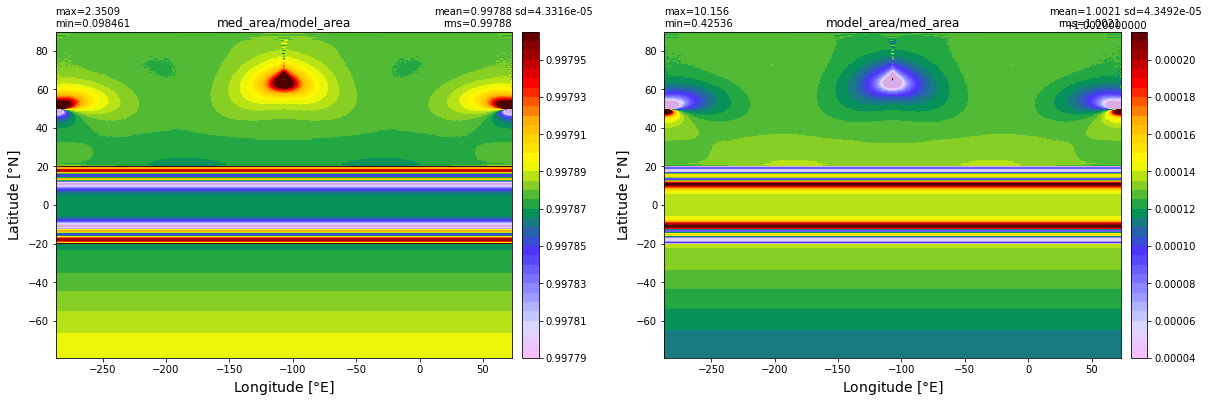

In [13]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

#med2mod_areacor = np.ma.masked_where(grd.wet==0,med_area/model_area)
#mod2med_areacor = np.ma.masked_where(grd.wet==0,model_area/med_area)

med2mod_areacor = med_area/model_area
mod2med_areacor = model_area/med_area

xyplot(med2mod_areacor,grd.geolon, grd.geolat, area, axis=ax1[0], title='med_area/model_area')
xyplot(mod2med_areacor,grd.geolon, grd.geolat, area, axis=ax1[1], title='model_area/med_area')


### CPL heat budget table (first hour)

In [14]:
n=0
net_heat_surface = np.nan_to_num(ds_mom.net_heat_surface[n,:].values) * mod2med_areacor
net_heat_coupler1 = np.nan_to_num(ds_mom.net_heat_coupler[n,:].values)* mod2med_areacor
sensible = np.nan_to_num(ds_mom.sensible[n,:].values)* mod2med_areacor
latent = np.nan_to_num(ds_mom.latent[n,:].values)* mod2med_areacor
SW = np.nan_to_num(ds_mom.SW[n,:].values)* mod2med_areacor
LW = np.nan_to_num(ds_mom.LW[n,:].values)* mod2med_areacor
Heat_PmE = np.nan_to_num(ds_mom.Heat_PmE[n,:].values)* mod2med_areacor
seaice_melt_heat = np.nan_to_num(ds_mom.seaice_melt_heat[n,:].values)* mod2med_areacor
net_heat_coupler2 = sensible + latent + SW + LW + seaice_melt_heat
frazil = np.nan_to_num(ds_mom.frazil[n,:].values)* mod2med_areacor
latent_evap= np.nan_to_num(ds_mom.latent_evap[n,:].values)* mod2med_areacor
latent_fprec_diag= np.nan_to_num(ds_mom.latent_fprec_diag[n,:].values)* mod2med_areacor
latent_frunoff= np.nan_to_num(ds_mom.latent_frunoff[n,:].values)* mod2med_areacor

evap= np.nan_to_num(ds_mom.evap[n,:].values)* mod2med_areacor #* 1.0e6
lprec= np.nan_to_num(ds_mom.lprec[n,:].values)* mod2med_areacor# * 1.0e6


heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)* mod2med_areacor
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)* mod2med_areacor
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)* mod2med_areacor
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)* mod2med_areacor
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)* mod2med_areacor
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)* mod2med_areacor
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)* mod2med_areacor
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)* mod2med_areacor
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)* mod2med_areacor

# mass
fprec_mom = np.ma.masked_invalid(ds_mom.fprec[n,:].values)* mod2med_areacor
frunoff_mom = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)* mod2med_areacor
evap_mom = np.ma.masked_invalid(ds_mom.evap[n,:].values)* mod2med_areacor

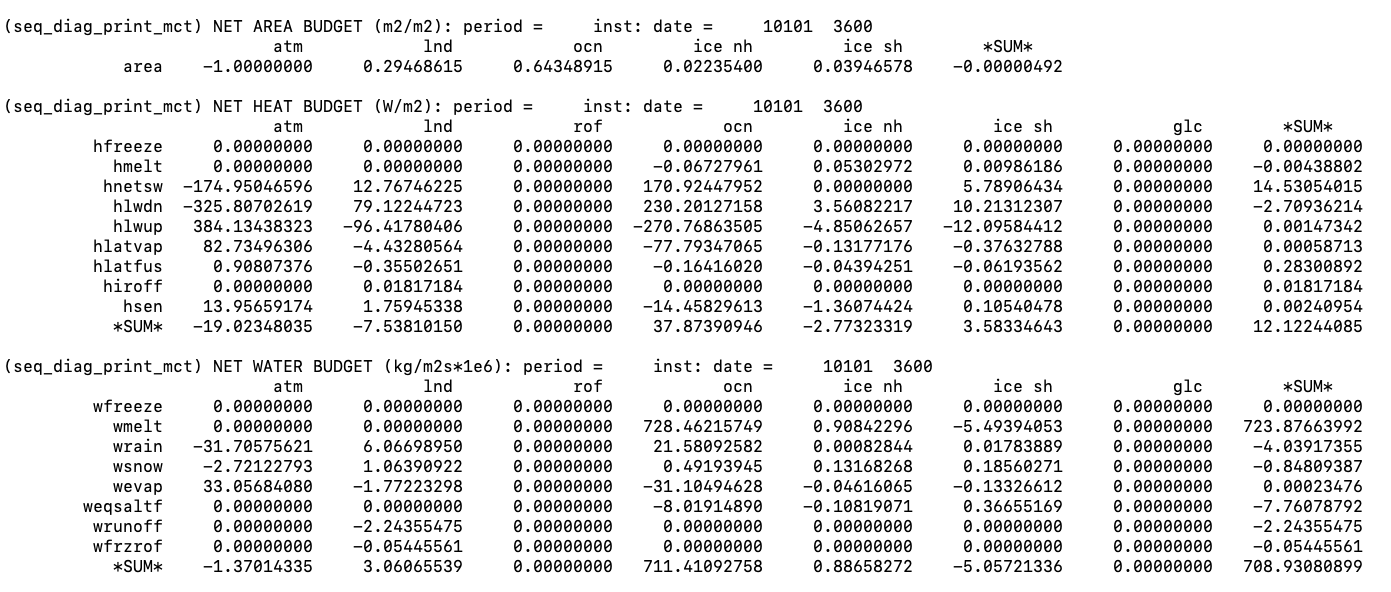

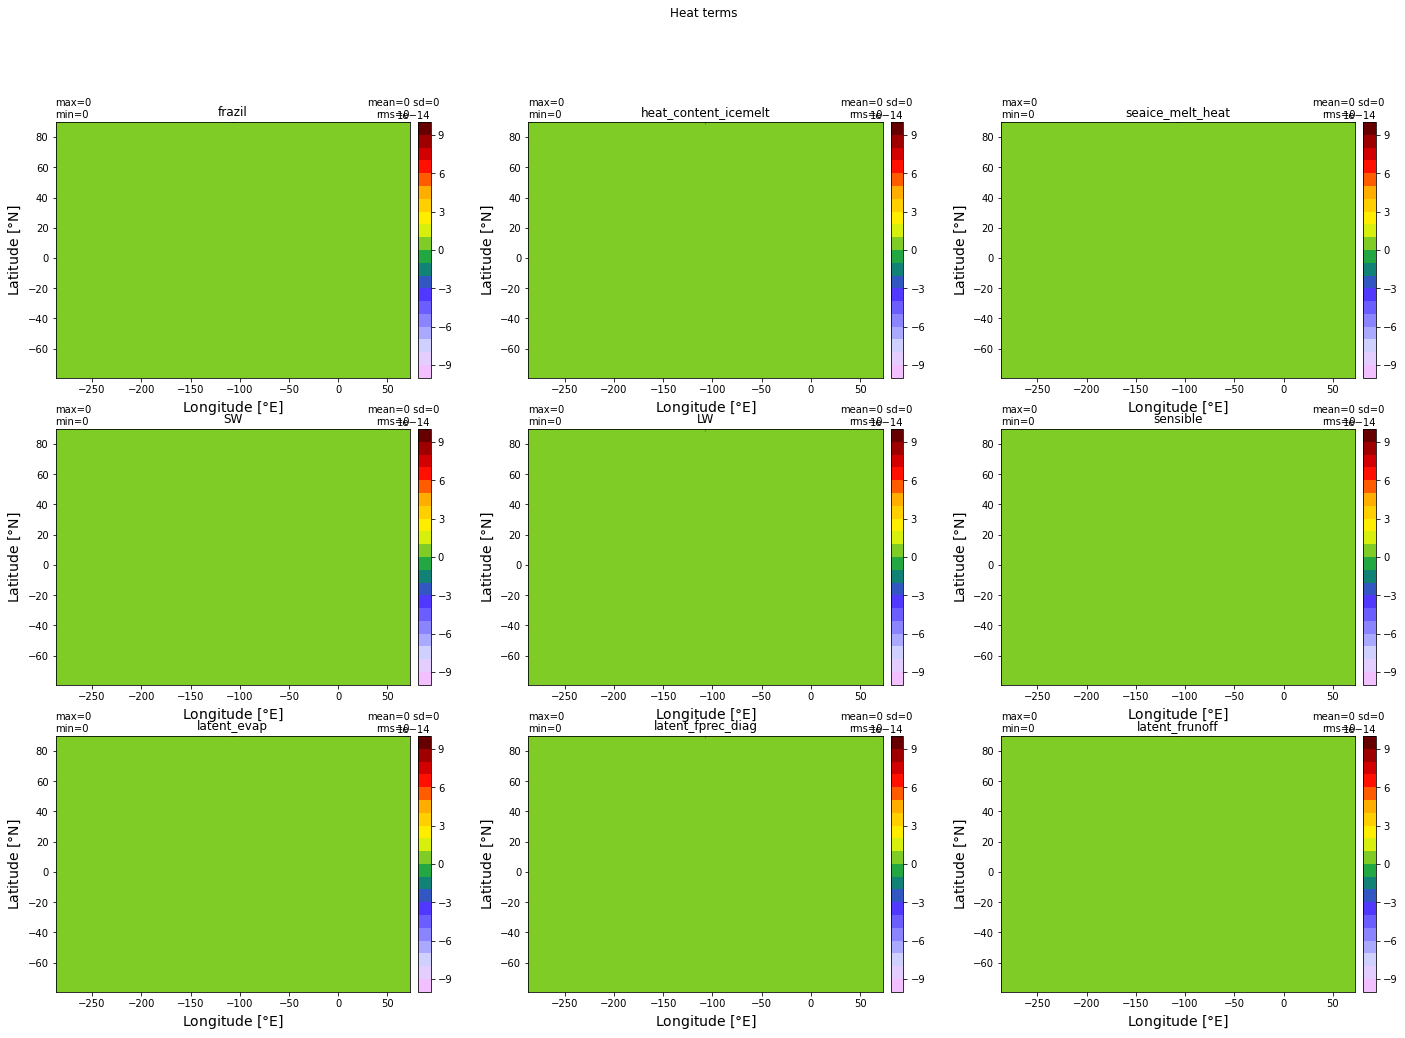

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,16))
ax1 = ax.flatten()
plt.suptitle('Heat terms')
xyplot(frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='frazil')
xyplot(heat_content_icemelt,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='heat_content_icemelt')
xyplot(seaice_melt_heat,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='seaice_melt_heat')

xyplot(SW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='SW')
xyplot(LW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], title='LW')
xyplot(sensible,grd.geolon, grd.geolat, grd.area_t, axis=ax1[5], title='sensible')

xyplot(latent_evap,grd.geolon, grd.geolat, grd.area_t, axis=ax1[6], title='latent_evap')
xyplot(latent_fprec_diag,grd.geolon, grd.geolat, grd.area_t, axis=ax1[7], title='latent_fprec_diag')
xyplot(latent_frunoff,grd.geolon, grd.geolat, grd.area_t, axis=ax1[8], title='latent_frunoff')

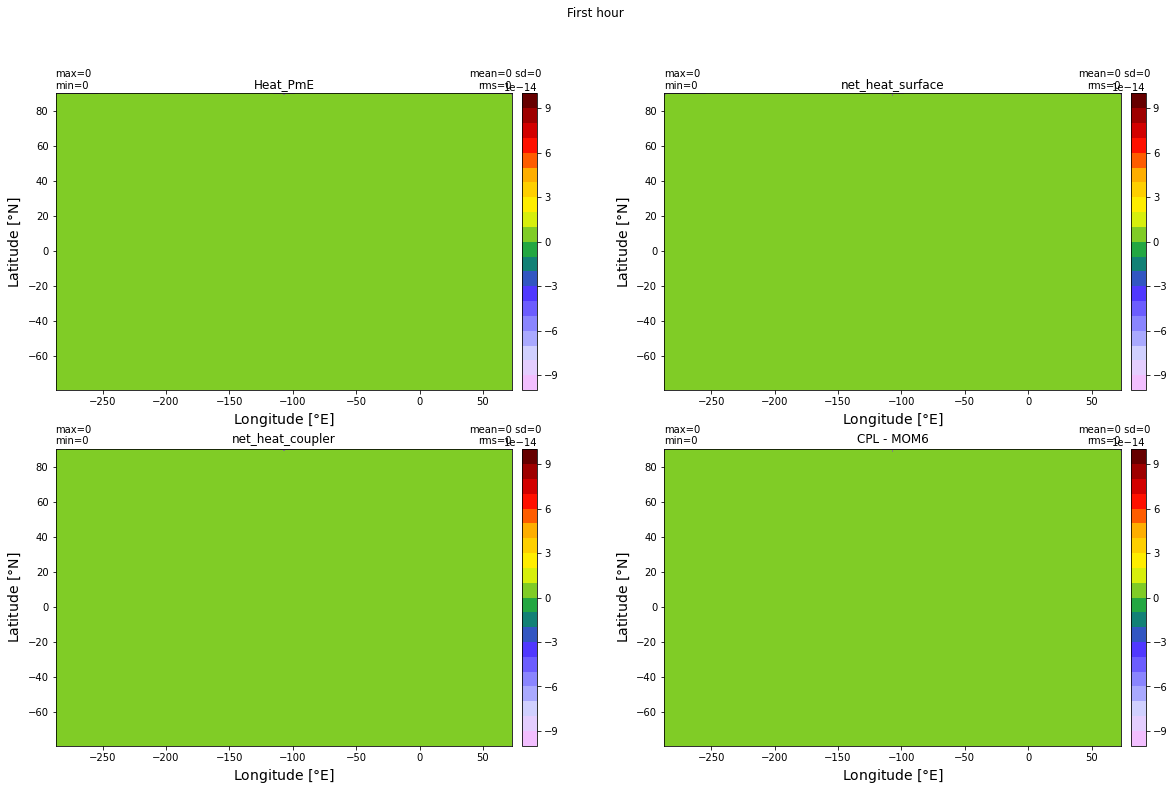

In [16]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax1 = ax.flatten()
plt.suptitle('First hour')

xyplot(Heat_PmE,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='Heat_PmE')
xyplot(net_heat_surface,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='net_heat_surface')
xyplot(net_heat_coupler1+frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='net_heat_coupler')
xyplot(net_heat_surface-(net_heat_coupler1+frazil),grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='CPL - MOM6')

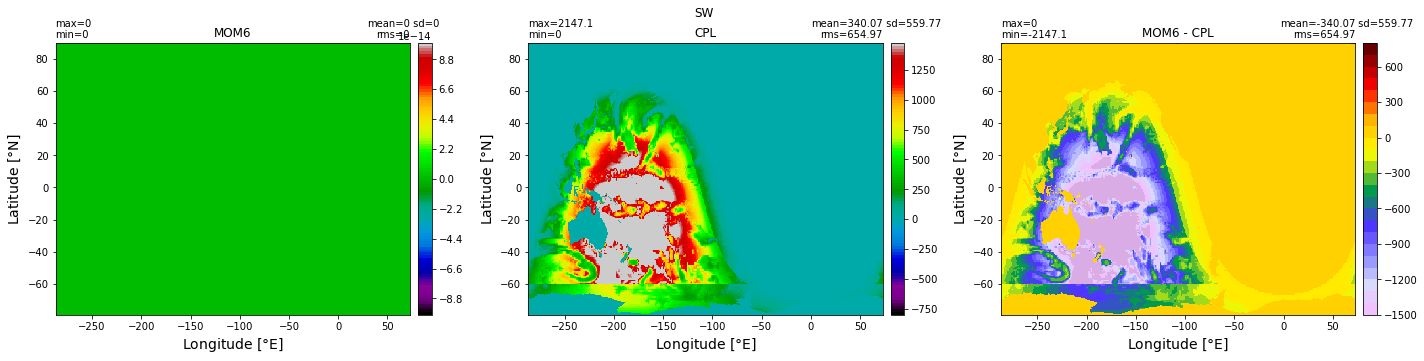

In [17]:
%matplotlib inline

sw_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_swnet[n,:].values) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')
xyplot(SW, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(SW-sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### CPL heat budget table (3rd hour)

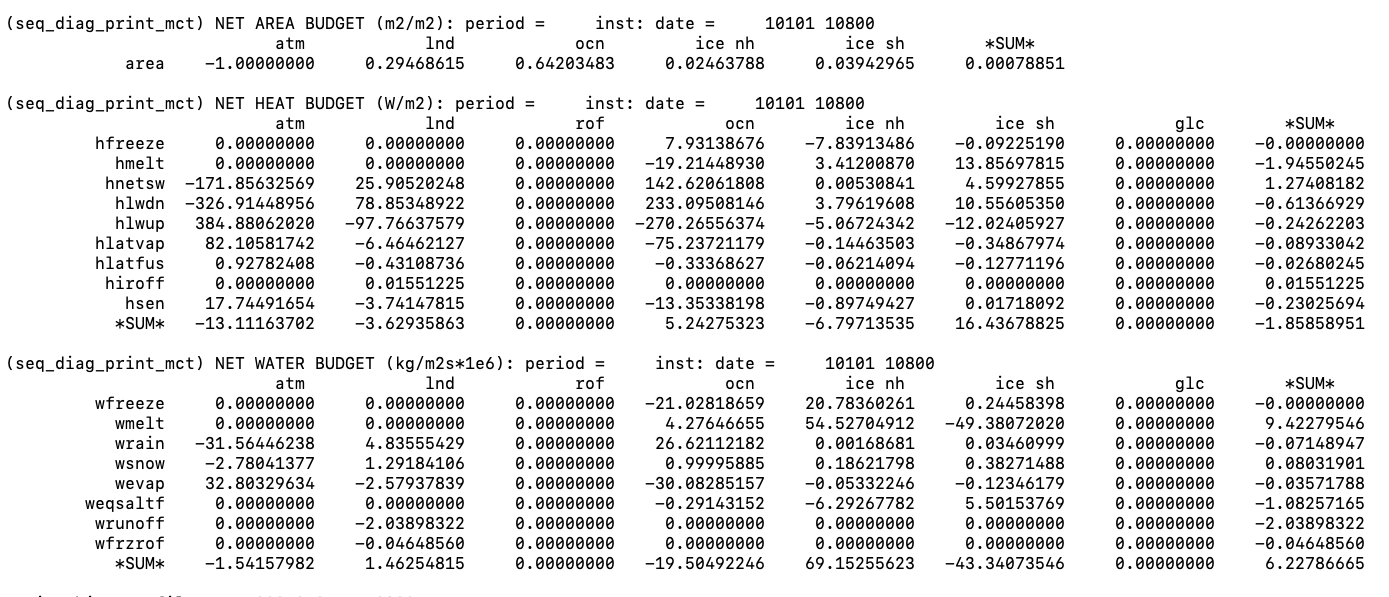

In [19]:
n=2
print(ds_mom.time[n].values)
net_heat_surface = np.nan_to_num(ds_mom.net_heat_surface[n,:].values) * mod2med_areacor
net_heat_coupler1 = np.nan_to_num(ds_mom.net_heat_coupler[n,:].values)* mod2med_areacor
sensible = np.nan_to_num(ds_mom.sensible[n,:].values)* mod2med_areacor
latent = np.nan_to_num(ds_mom.latent[n,:].values)* mod2med_areacor
SW = np.nan_to_num(ds_mom.SW[n,:].values)* mod2med_areacor
LW = np.nan_to_num(ds_mom.LW[n,:].values)* mod2med_areacor
Heat_PmE = np.nan_to_num(ds_mom.Heat_PmE[n,:].values)* mod2med_areacor
seaice_melt_heat = np.nan_to_num(ds_mom.seaice_melt_heat[n,:].values)* mod2med_areacor
net_heat_coupler2 = sensible + latent + SW + LW + seaice_melt_heat
frazil = np.nan_to_num(ds_mom.frazil[n,:].values)* mod2med_areacor
latent_evap= np.nan_to_num(ds_mom.latent_evap[n,:].values)* mod2med_areacor
latent_fprec_diag= np.nan_to_num(ds_mom.latent_fprec_diag[n,:].values)* mod2med_areacor
latent_frunoff= np.nan_to_num(ds_mom.latent_frunoff[n,:].values)* mod2med_areacor

evap= np.nan_to_num(ds_mom.evap[n,:].values)* mod2med_areacor #* 1.0e6
lprec= np.nan_to_num(ds_mom.lprec[n,:].values)* mod2med_areacor #* 1.0e6


heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)* mod2med_areacor
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)* mod2med_areacor
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)* mod2med_areacor
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)* mod2med_areacor
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)* mod2med_areacor
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)* mod2med_areacor
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)* mod2med_areacor
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)* mod2med_areacor
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)* mod2med_areacor

# mass
fprec_mom = np.ma.masked_invalid(ds_mom.fprec[n,:].values)* mod2med_areacor
frunoff_mom = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)* mod2med_areacor
evap_mom = np.ma.masked_invalid(ds_mom.evap[n,:].values)* mod2med_areacor

0001-01-01 03:00:00


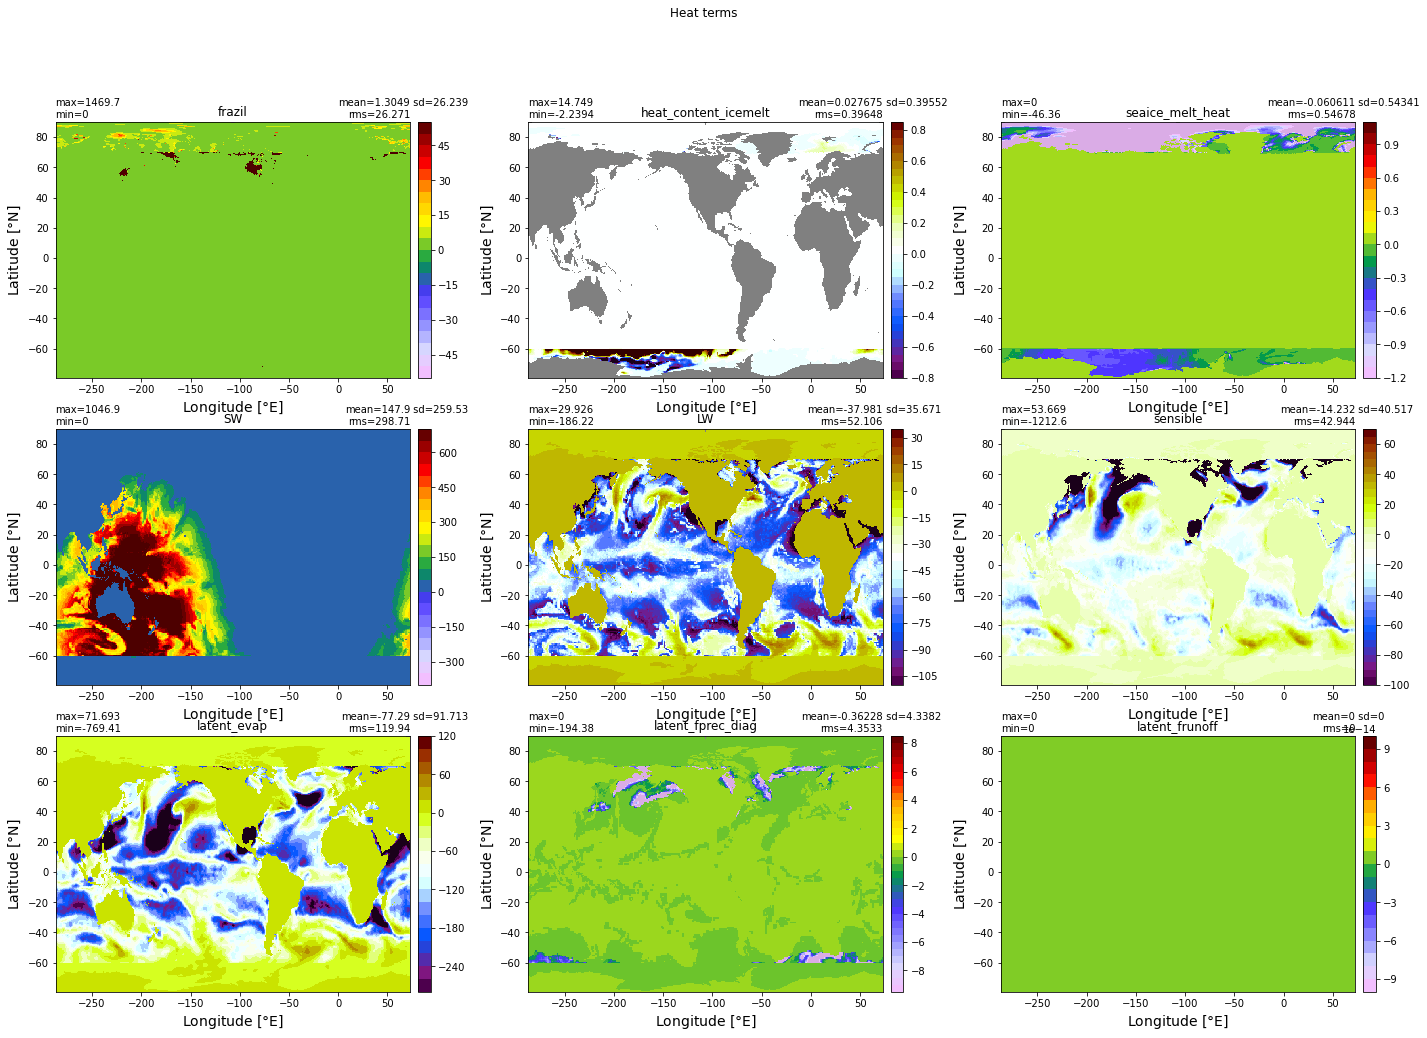

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,16))
ax1 = ax.flatten()
plt.suptitle('Heat terms')
xyplot(frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='frazil')
xyplot(heat_content_icemelt,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='heat_content_icemelt')
xyplot(seaice_melt_heat,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='seaice_melt_heat')

xyplot(SW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='SW')
xyplot(LW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], title='LW')
xyplot(sensible,grd.geolon, grd.geolat, grd.area_t, axis=ax1[5], title='sensible')

xyplot(latent_evap,grd.geolon, grd.geolat, grd.area_t, axis=ax1[6], title='latent_evap')
xyplot(latent_fprec_diag,grd.geolon, grd.geolat, grd.area_t, axis=ax1[7], title='latent_fprec_diag')
xyplot(latent_frunoff,grd.geolon, grd.geolat, grd.area_t, axis=ax1[8], title='latent_frunoff')

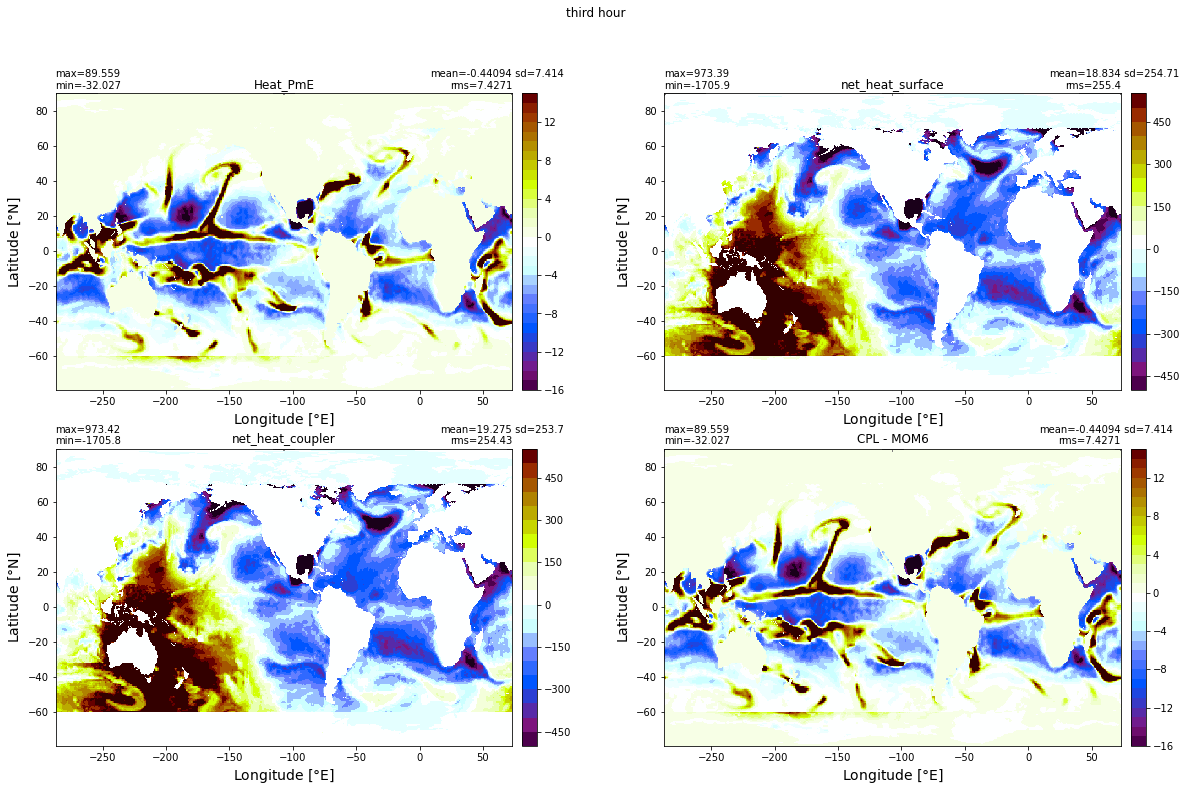

In [22]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax1 = ax.flatten()
plt.suptitle('third hour')

xyplot(Heat_PmE,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='Heat_PmE')
xyplot(net_heat_surface,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='net_heat_surface')
xyplot(net_heat_coupler1+frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='net_heat_coupler')
xyplot(net_heat_surface-(net_heat_coupler1+frazil),grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='CPL - MOM6')

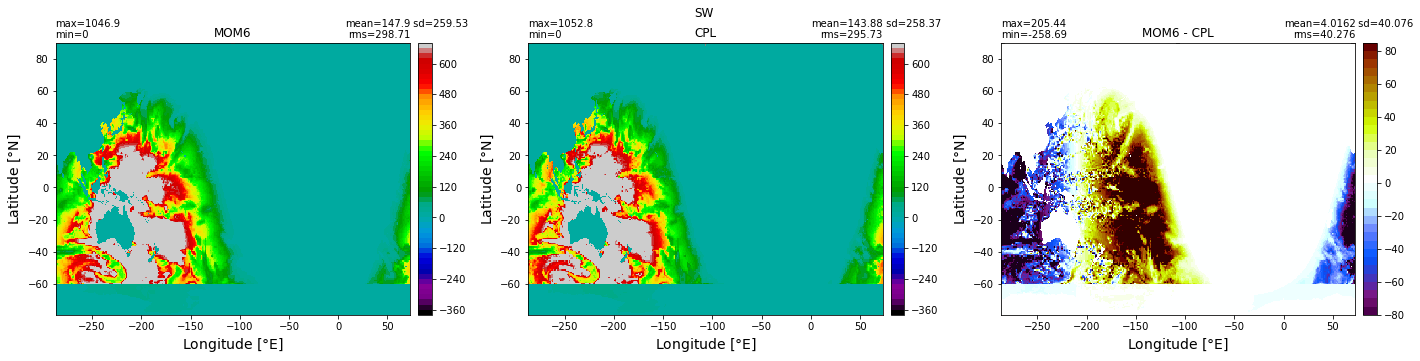

In [25]:
sw_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_swnet[n,:].values) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')
xyplot(SW, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(SW-sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

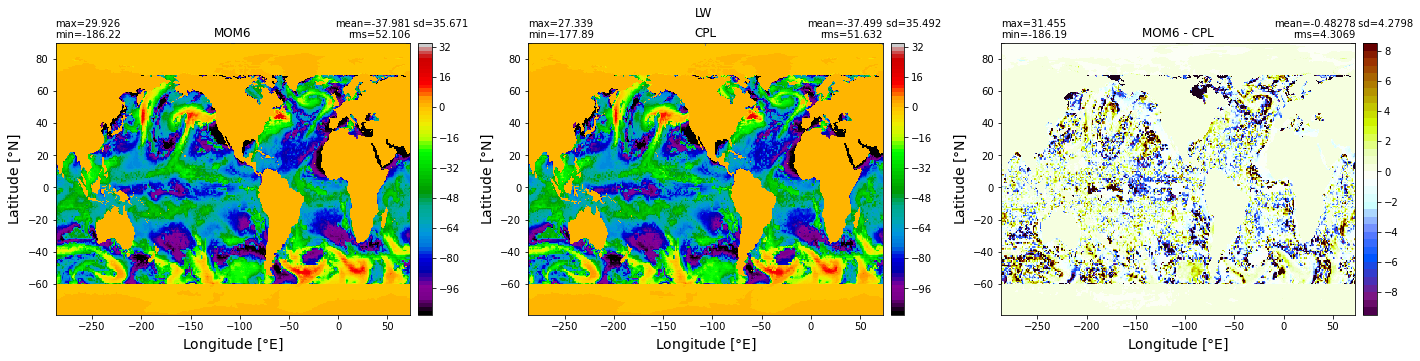

In [27]:
lw_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_lwup[n,:].values) + \
        np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_lwdn[n,:].values)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('LW')
xyplot(LW, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(lw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(LW-lw_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

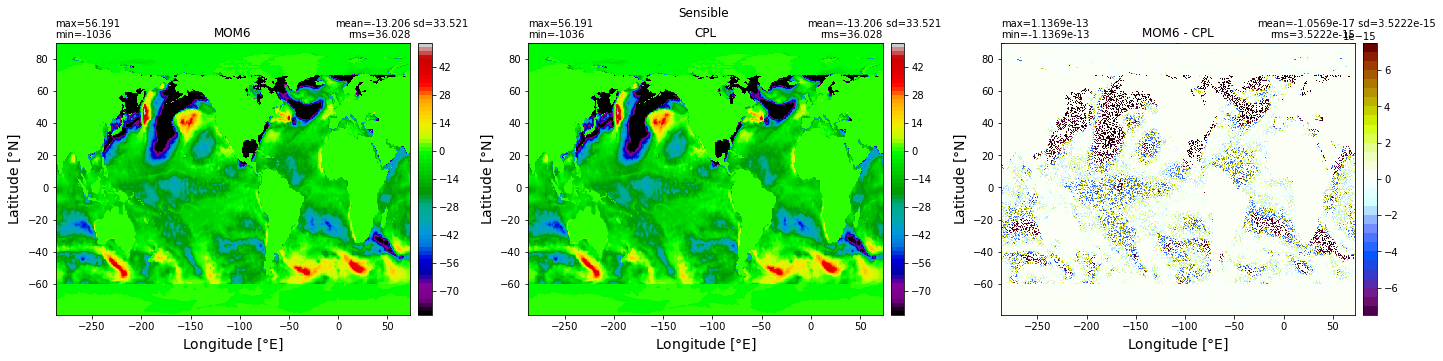

In [107]:
%matplotlib inline

sen_cpl = np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_sen[n,:].values) 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Sensible')
xyplot(sensible, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sensible - sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

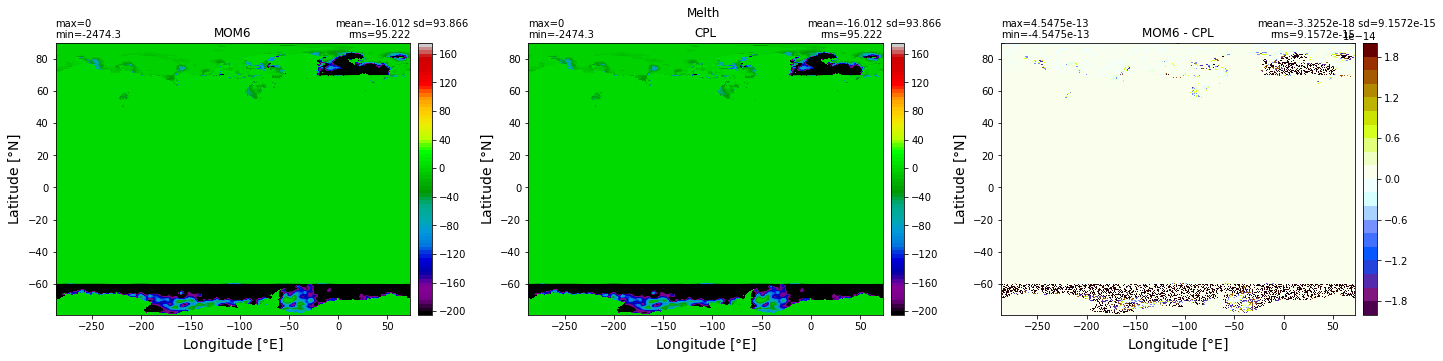

In [108]:
%matplotlib inline

melth_cpl = np.ma.masked_invalid(ds_cpl.ocnExp_Fioi_melth[n,:].values) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Melth')
xyplot(seaice_melt_heat, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(seaice_melt_heat - melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

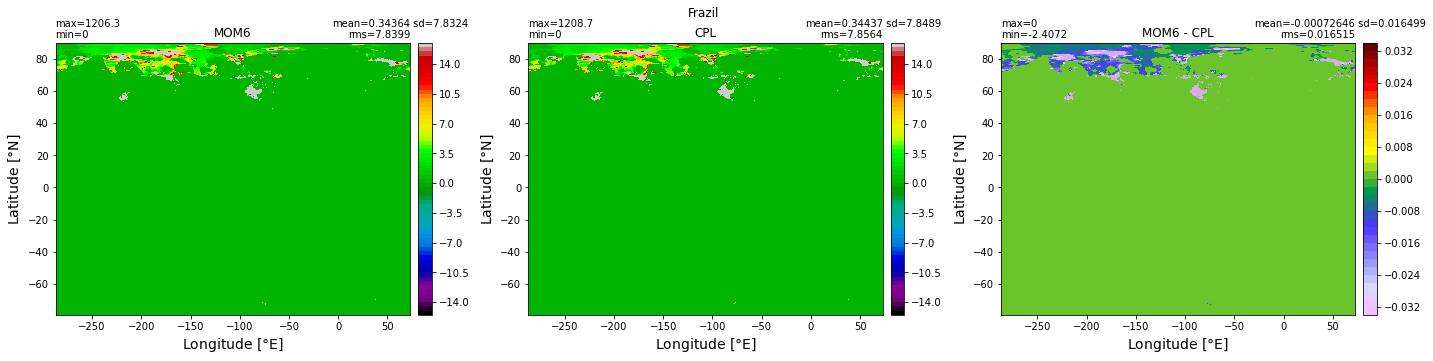

In [109]:
frazil_cpl = np.ma.masked_invalid(ds_cpl.ocnImp_Fioo_q[n,:].values) * med2mod_areacor

frazil_cpl[frazil_cpl<0.] = 0.
    
#frazil_cpl = np.ma.masked_where(frazil_mom.mask,frazil_cpl)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Frazil')
xyplot(frazil, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(frazil_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(frazil - frazil_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

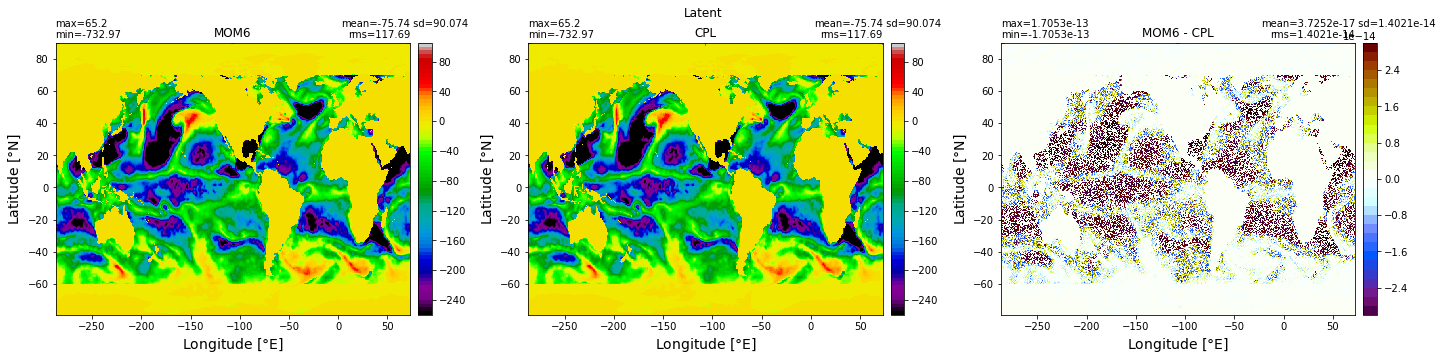

In [110]:
# the above does not match. Let compute latent using the mass fluxes instead:
ocnExp_Faxa_snow = np.ma.masked_invalid(ds_cpl.ocnExp_Faxa_snow[n,:].values) 
ocnExp_Foxx_evap = np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_evap[n,:].values) 
ocnExp_Foxx_rofi = np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_rofi[n,:].values) 
lat_cpl = -(ocnExp_Faxa_snow * latent_heat_fusion) -(ocnExp_Foxx_rofi*latent_heat_fusion) + \
            (ocnExp_Foxx_evap * latent_heat_vapor)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot(latent, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(latent - lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

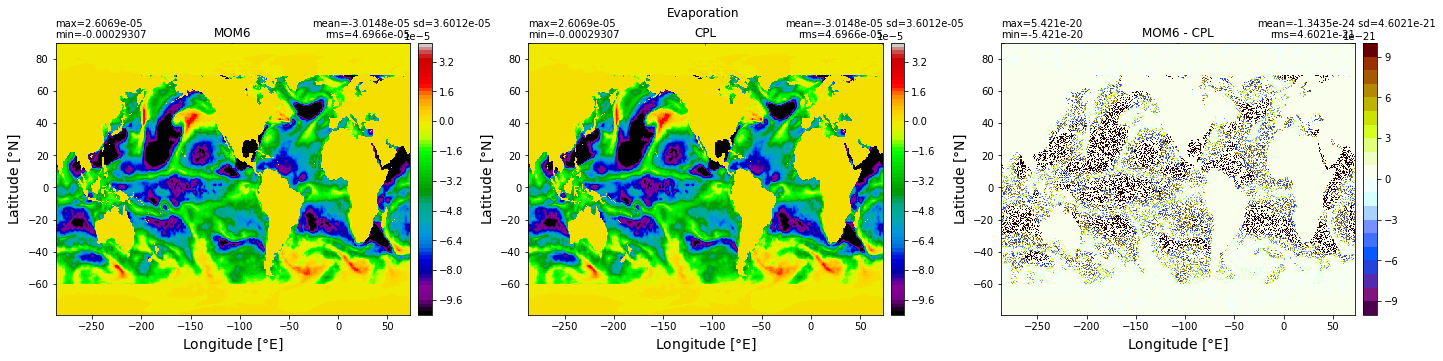

In [111]:
# this looks much better. Question: why is the field above different?
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Evaporation')
xyplot(evap, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(ocnExp_Foxx_evap, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot((evap - ocnExp_Foxx_evap), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

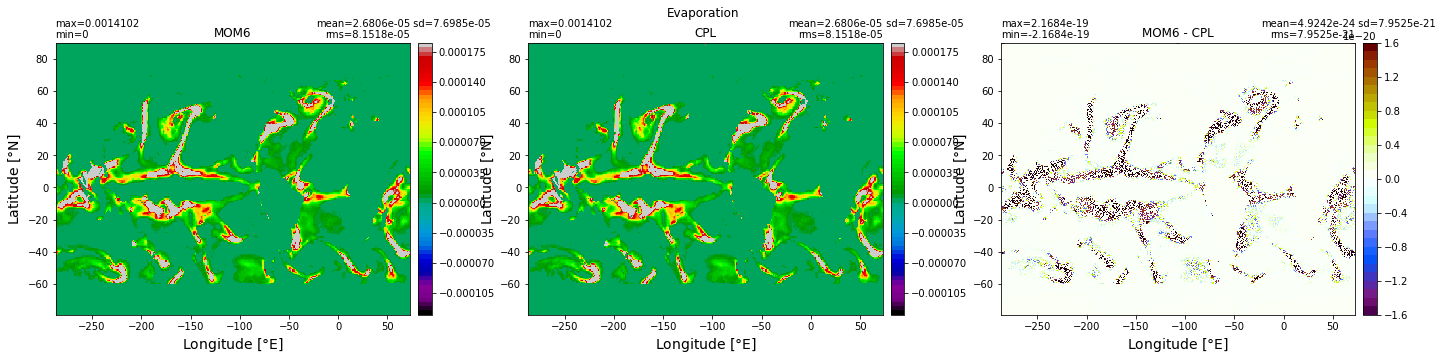

In [112]:
ocnExp_Faxa_rain = np.ma.masked_invalid(ds_cpl.ocnExp_Faxa_rain[n,:].values) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Evaporation')
xyplot(lprec, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(ocnExp_Faxa_rain, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot((lprec - ocnExp_Faxa_rain), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])